# **BlueBerry Yield Prediction**

## **1. Import libraries**

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## **2. Import data**

In [223]:
train_data = pd.read_csv('/home/davidkibet/Desktop/ML /data/train.csv')
test_data = pd.read_csv('/home/davidkibet/Desktop/ML /data/test.csv')

In [224]:
# from google.colab import drive
# drive.mount('/content/drive')

## **3. Preview data**

In [225]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [226]:
train_data.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [227]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [228]:
train_data.describe().T

count         mean          std          min  \
id                    15289.0  7644.000000  4413.698468     0.000000   
clonesize             15289.0    19.704690     6.595211    10.000000   
honeybee              15289.0     0.389314     0.361643     0.000000   
bumbles               15289.0     0.286768     0.059917     0.000000   
andrena               15289.0     0.492675     0.148115     0.000000   
osmia                 15289.0     0.592355     0.139489     0.000000   
MaxOfUpperTRange      15289.0    82.169887     9.146703    69.700000   
MinOfUpperTRange      15289.0    49.673281     5.546405    39.000000   
AverageOfUpperTRange  15289.0    68.656256     7.641807    58.200000   
MaxOfLowerTRange      15289.0    59.229538     6.610640    50.200000   
MinOfLowerTRange      15289.0    28.660553     3.195367    24.300000   
AverageOfLowerTRange  15289.0    48.568500     5.390545    41.200000   
RainingDays           15289.0    18.660865    11.657582     1.000000   
AverageRainingDays    15289.0     0.324176     0.163905     0.060000   
fruitset              15289.0     0.502741     0.074390     0.192732   
fruitmass             15289.0     0.446553     0.037035     0.311921   
seeds                 15289.0    36.164950     4.031087    22.079199   
yield                 15289.0  6025.193999  1337.056850  1945.530610   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               12.500000    25.000000     25.000000     40.000000  
honeybee                 0.250000     0.500000      0.500000     18.430000  
bumbles                  0.250000     0.250000      0.380000      0.585000  
andrena                  0.380000     0.500000      0.630000      0.750000  
osmia                    0.500000     0.630000      0.750000      0.750000  
MaxOfUpperTRange        77.400000    86.000000     86.000000     94.600000  
MinOfUpperTRange        46.800000    52.000000     52.000000     57.200000  
AverageOfUpperTRange    64.700000    71.900000     71.900000     79.000000  
MaxOfLowerTRange        55.800000    62.000000     62.000000     68.200000  
MinOfLowerTRange        27.000000    30.000000     30.000000     33.000000  
AverageOfLowerTRange    45.800000    50.800000     50.800000     55.900000  
RainingDays             16.000000    16.000000     24.000000     34.000000  
AverageRainingDays       0.260000     0.260000      0.390000      0.560000  
fruitset                 0.458246     0.506600      0.560445      0.652144  
fruitmass                0.419216     0.446570      0.474134      0.535660  
seeds                   33.232449    36.040675     39.158238     46.585105  
yield                 5128.163510  6117.475900   7019.694380   8969.401840

- The yield has very high variation

## **4. Distribution of data**

In [229]:
train_data.skew()
# Honeybee has a lot of skew

id                       0.000000
clonesize                0.049861
honeybee                41.613244
bumbles                  0.815571
andrena                  0.162047
osmia                   -0.845196
MaxOfUpperTRange         0.007359
MinOfUpperTRange         0.002006
AverageOfUpperTRange    -0.004707
MaxOfLowerTRange         0.002450
MinOfLowerTRange         0.004846
AverageOfLowerTRange     0.005105
RainingDays             -0.261968
AverageRainingDays       0.081863
fruitset                -0.426606
fruitmass               -0.055531
seeds                    0.015387
yield                   -0.291195
dtype: float64

> honeybee has very high skew, also osmia

In [230]:
# reinitialise test_data columns
num_cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']

- plot a kdeplot showing the distribution of the test_data columns

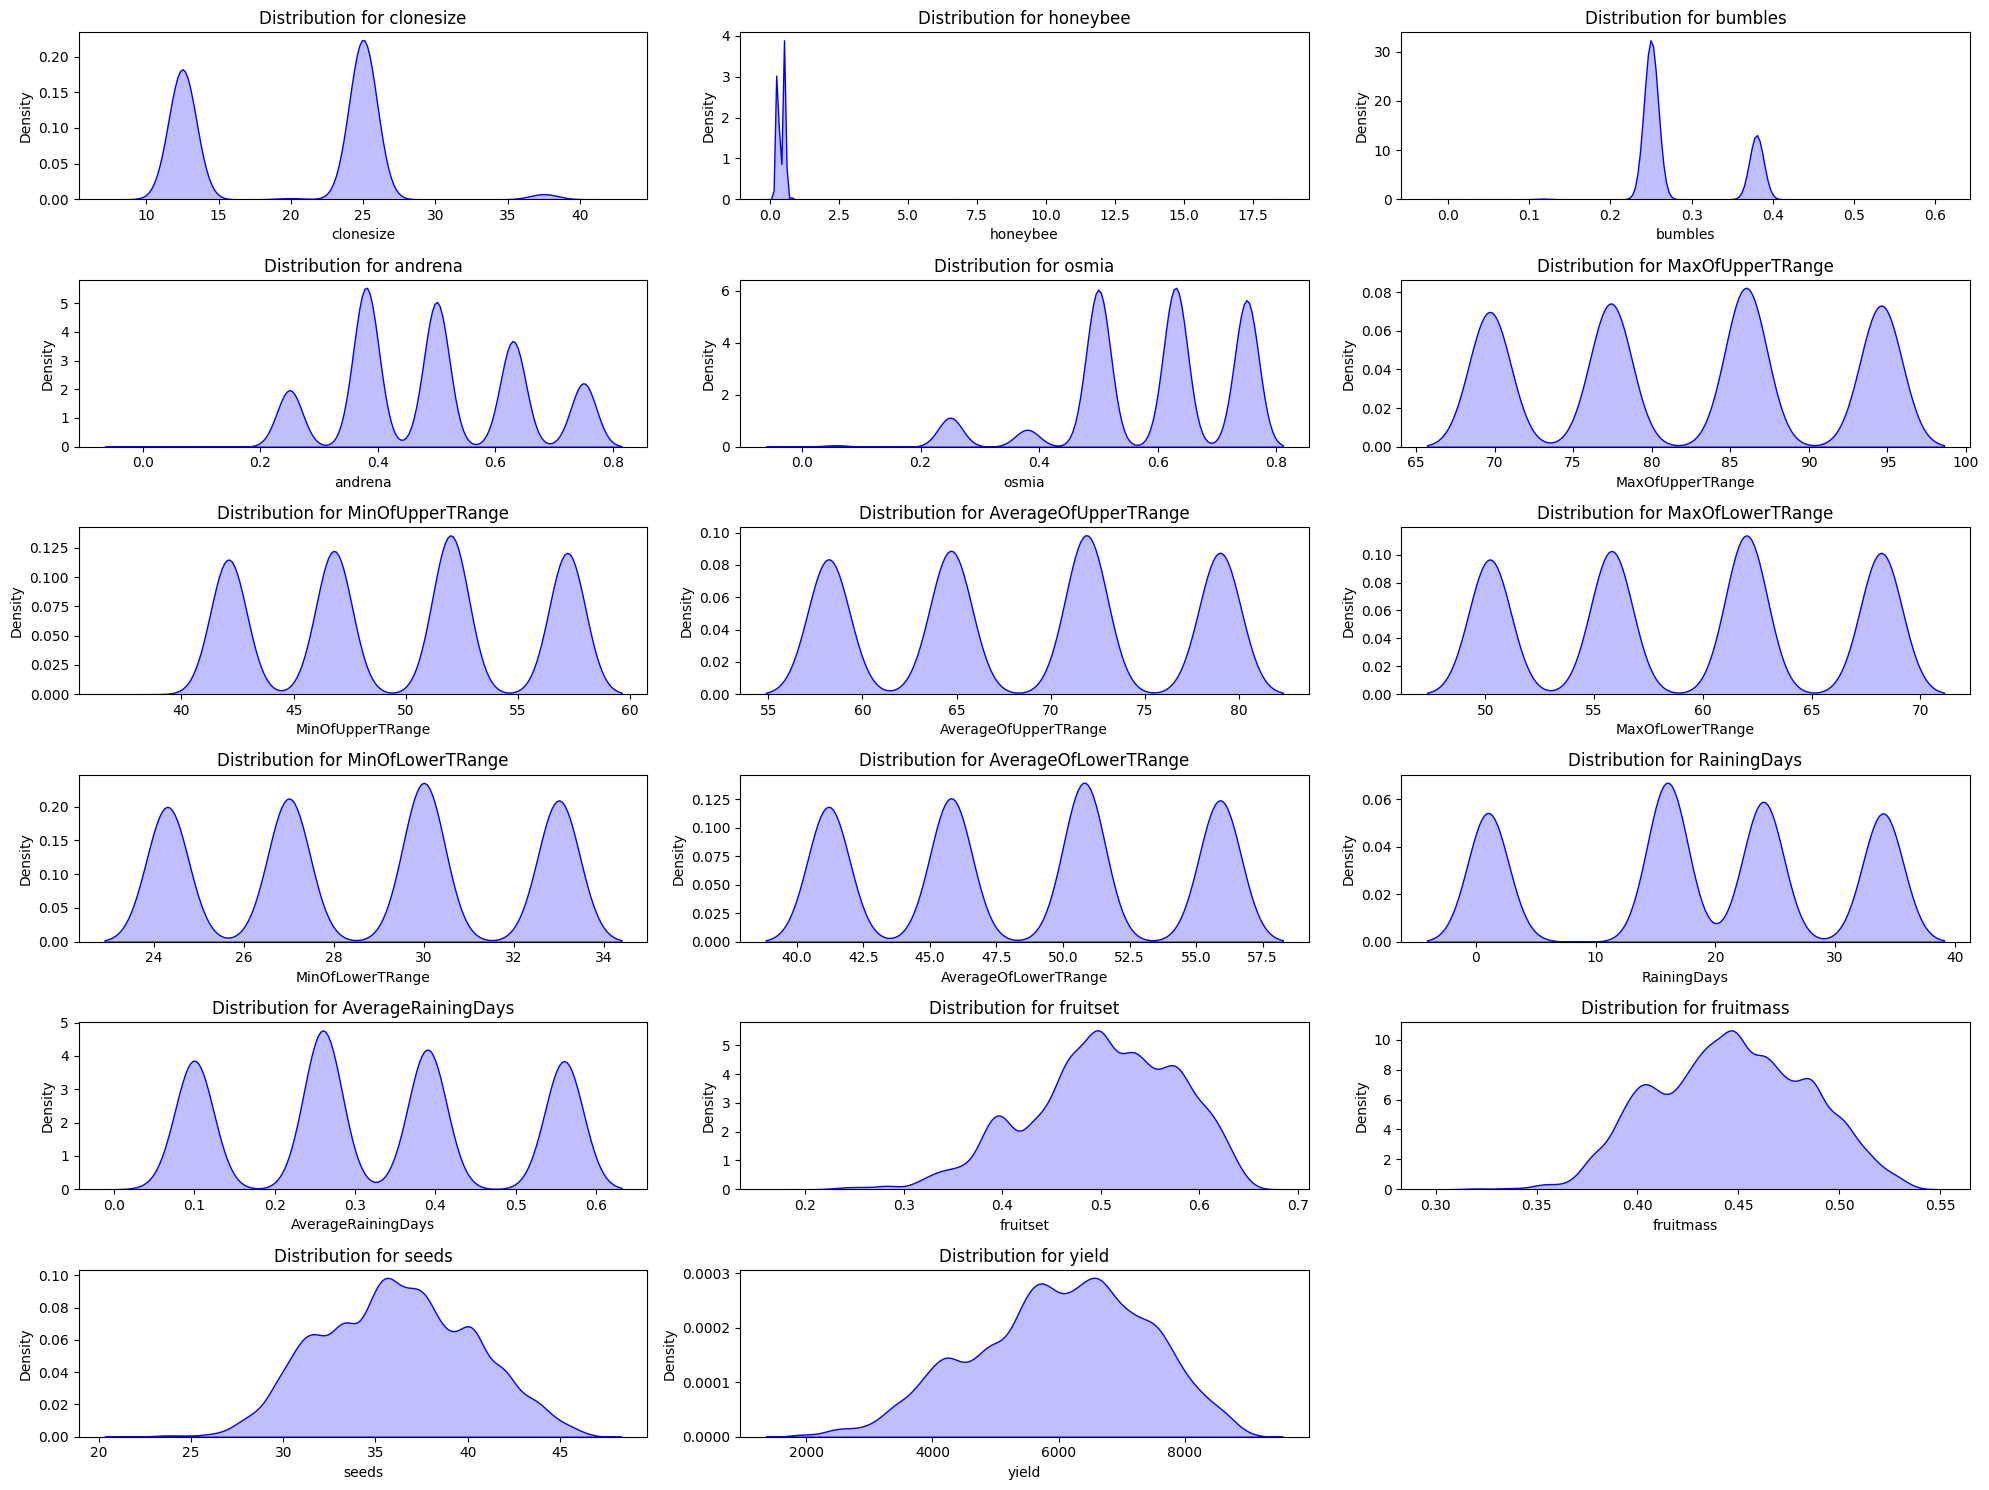

In [231]:
plt.figure(figsize=(20,15))

for i, col in enumerate(num_cols,1):
 plt.subplot(6,3,i)
 sns.kdeplot(train_data[col], fill=True, color='blue')
 plt.title(f'Distribution for {col}')

plt.tight_layout()
plt.show()

- plot a boxplot showing the distribution of the test_data columns

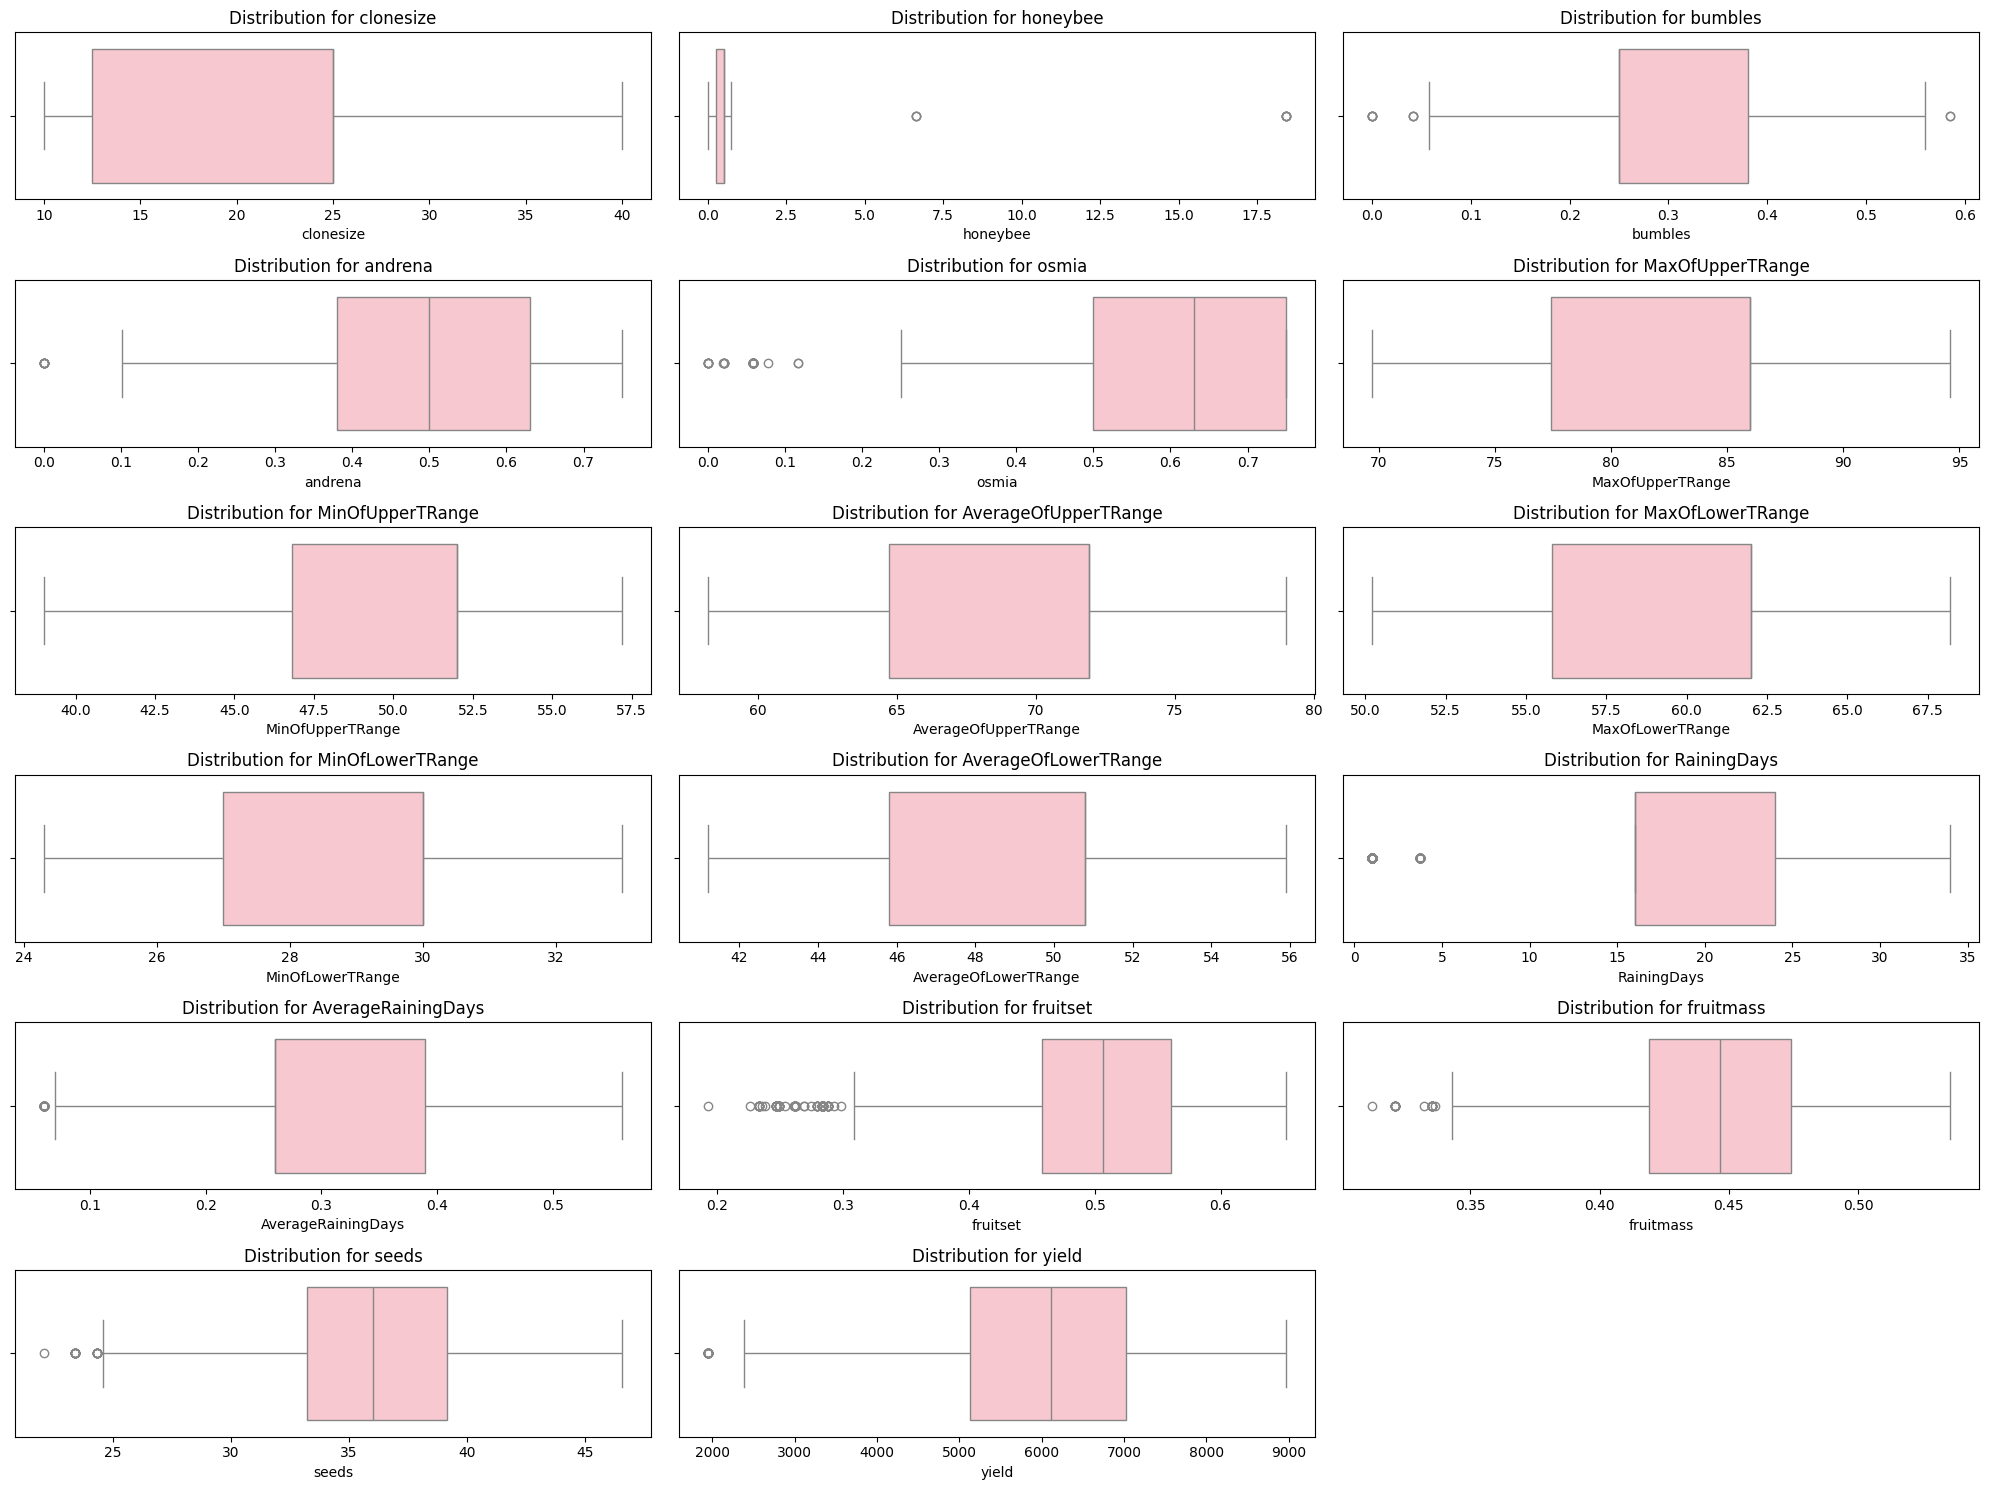

In [232]:
plt.figure(figsize=(20,15))

for i, col in enumerate(num_cols,1):
 plt.subplot(6,3,i)
 sns.boxplot(x=train_data[col], fill=True, color='pink')
 plt.title(f'Distribution for {col}')

plt.tight_layout()
plt.show()

## **5. Scaling and Transformation of data**

- **Transforming honeybee and osmia**

In [233]:
from scipy.stats import boxcox

# Transform honeybee
train_data["honeybee_boxcox"], lambda_val = boxcox(train_data["honeybee"] + 1)  # Add 1 to avoid zero issues
print("Honeybee Lambda:", lambda_val)  # The optimal power transformation

# Transform osmia
train_data["osmia_box_cox"], lambda_val = boxcox(train_data["osmia"]+1)  # Add 1 to avoid zero issues
print("Osmia Lambda:", lambda_val)  # The optimal power transformation

Honeybee Lambda: -1.6741824692718679
Osmia Lambda: 4.569498566422468


**research on: different types of boxcoxs**

- **plot honeybee and osmia**

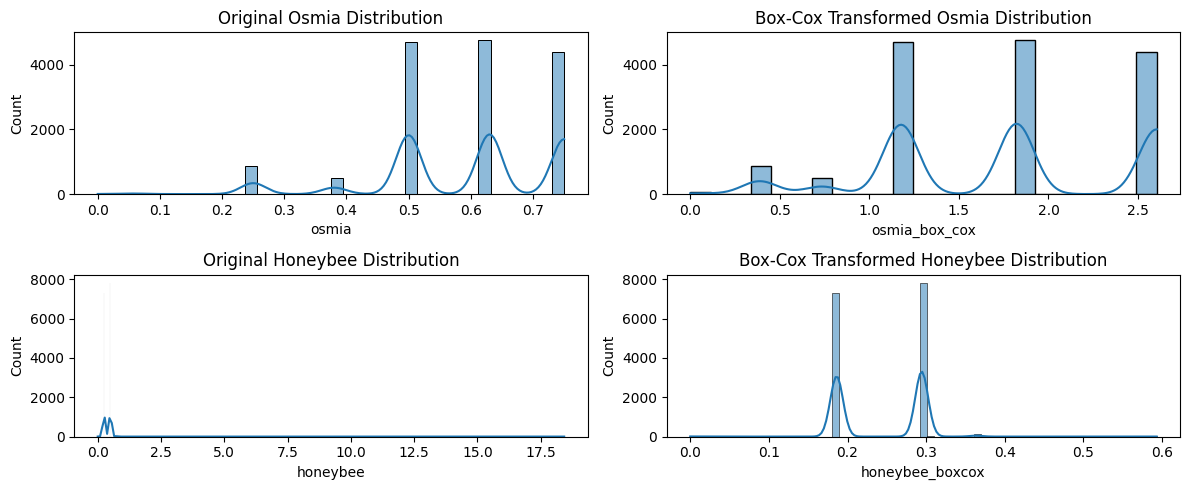

In [234]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

sns.histplot(train_data["osmia"], kde=True, ax=ax[0,0])
ax[0,0].set_title("Original Osmia Distribution")

sns.histplot(train_data["osmia_box_cox"], kde=True, ax=ax[0,1])
ax[0,1].set_title("Box-Cox Transformed Osmia Distribution")

sns.histplot(train_data["honeybee"], kde=True, ax=ax[1,0])
ax[1,0].set_title("Original Honeybee Distribution")

sns.histplot(train_data["honeybee_boxcox"], kde=True, ax=ax[1,1])
ax[1,1].set_title("Box-Cox Transformed Honeybee Distribution")

plt.tight_layout()
plt.show()

## **6. Correlation Heatmap**

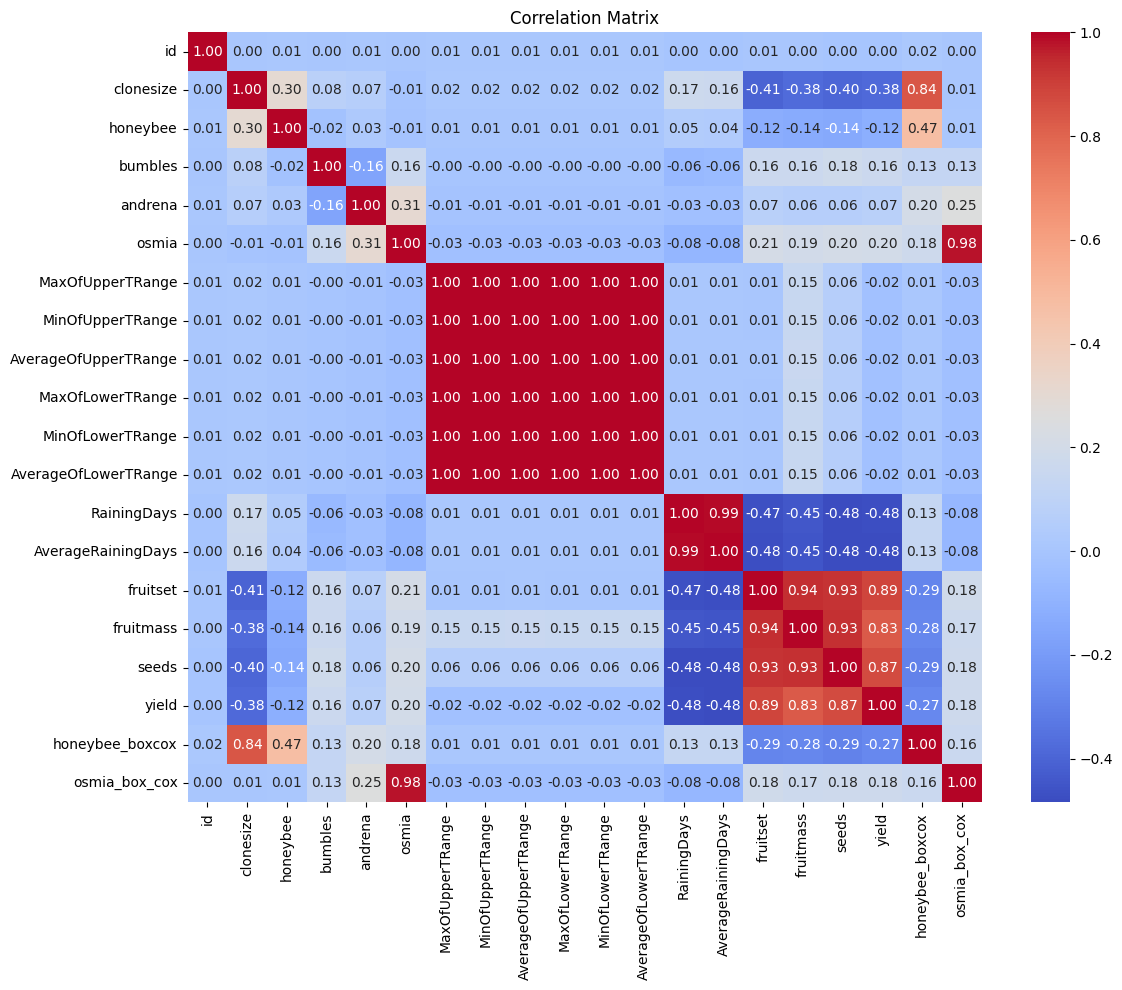

In [235]:
correlations = train_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

##  **7. Scatter plot**

In [236]:
def plot_scatter(df, target):

    # Select numeric columns excluding the target column
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = [col for col in num_cols if col != target]

    # Determine the number of subplots
    n_cols = 4  # Number of columns in the subplot grid
    n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate the number of rows

    # Create the figure and axes
    plt.figure(figsize=(20, 5 * n_rows))  # Adjust figure height based on the number of rows
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.scatterplot(x=df[col], y=df[target], alpha=0.5)
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel(target)
    # plt.savefig('plots/scatterplot.png', dpi=300, bbox_inches="tight")
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

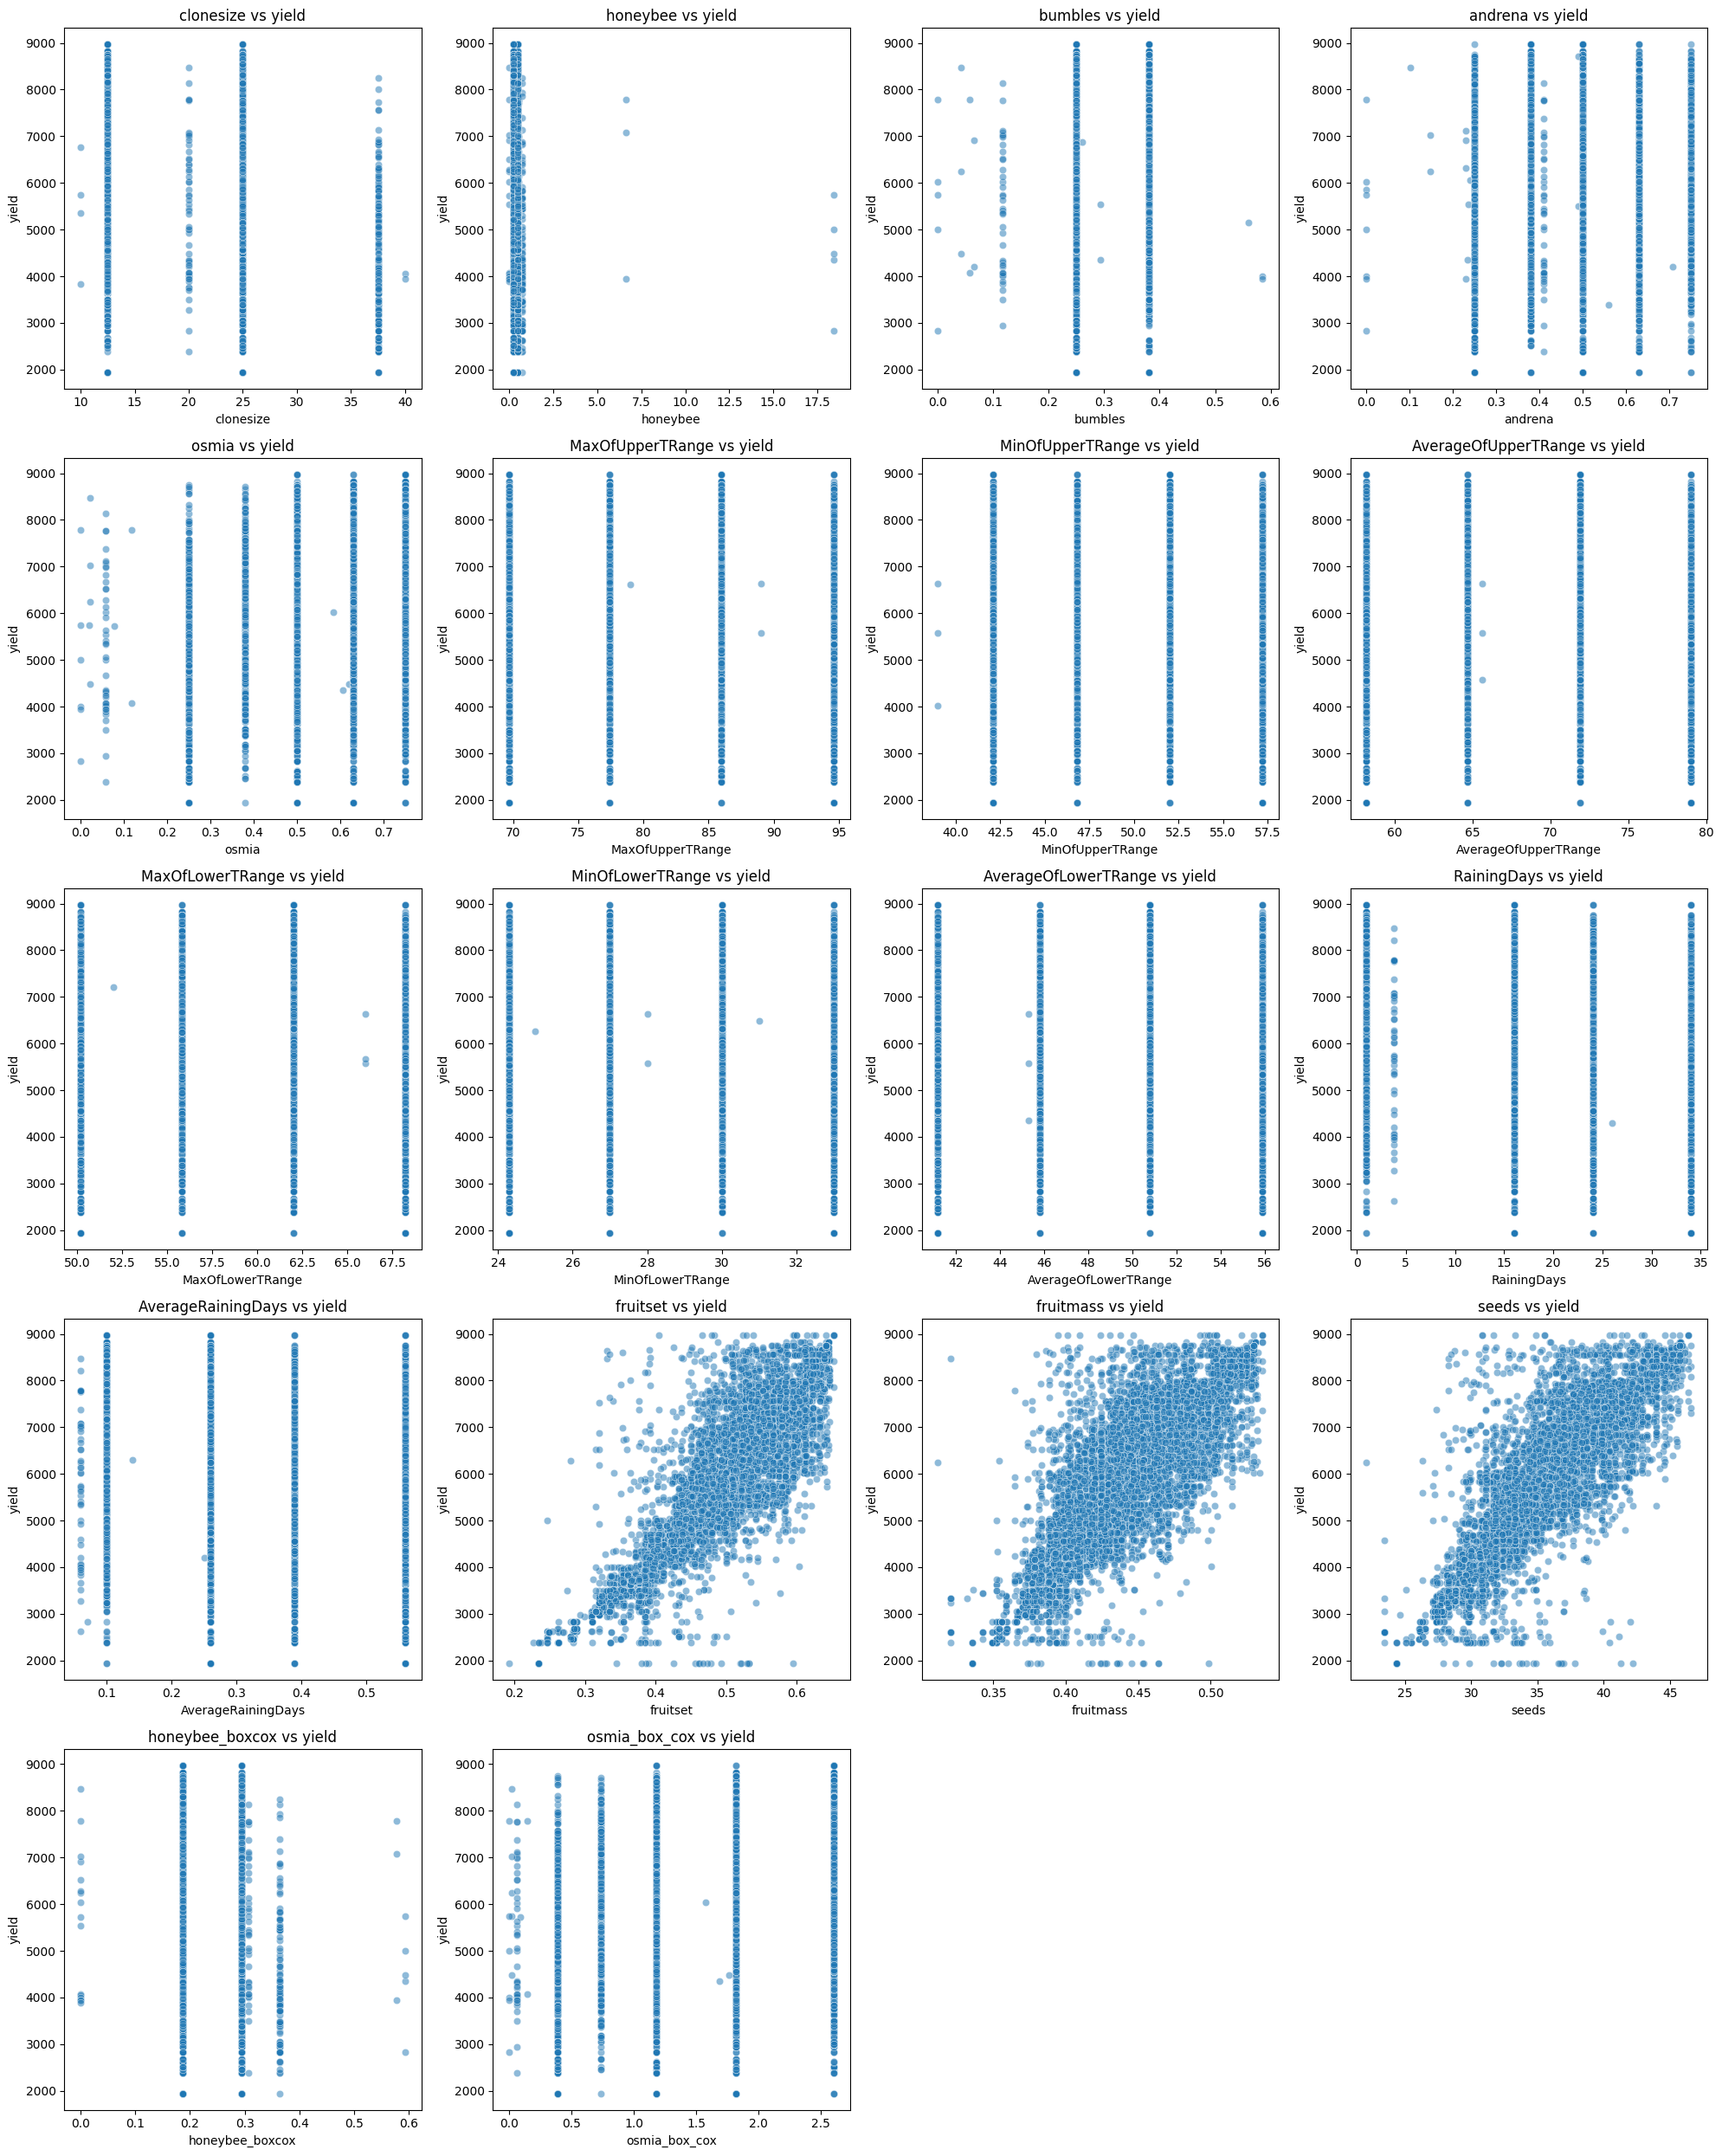

In [237]:
plot_scatter(train_data.drop('id',axis=1),'yield')

In [238]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

## Fruitmass, fruitset and yield

In [239]:
train_data.skew()
# Skewness has improved

id                       0.000000
clonesize                0.049861
honeybee                41.613244
bumbles                  0.815571
andrena                  0.162047
osmia                   -0.845196
MaxOfUpperTRange         0.007359
MinOfUpperTRange         0.002006
AverageOfUpperTRange    -0.004707
MaxOfLowerTRange         0.002450
MinOfLowerTRange         0.004846
AverageOfLowerTRange     0.005105
RainingDays             -0.261968
AverageRainingDays       0.081863
fruitset                -0.426606
fruitmass               -0.055531
seeds                    0.015387
yield                   -0.291195
honeybee_boxcox         -0.001213
osmia_box_cox           -0.124483
dtype: float64

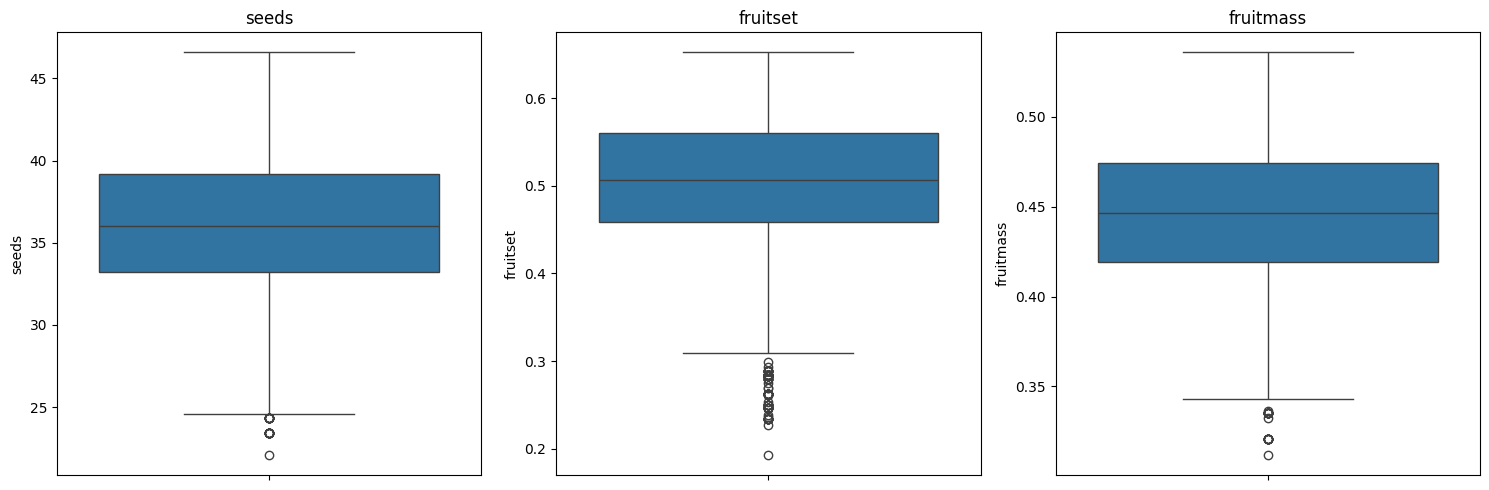

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots to identify outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(['seeds', 'fruitset', 'fruitmass']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [241]:
# Create a polynomial transformer if needed
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(train_data[['seeds', 'fruitset', 'fruitmass']])

# Create feature names and add to dataframe
feature_names = poly.get_feature_names_out(['seeds', 'fruitset', 'fruitmass'])
df_poly = pd.DataFrame(poly_features, columns=feature_names)

In [242]:
df_poly['yield'] = train_data['yield']

In [243]:
df_poly.head()

seeds  fruitset  fruitmass      seeds^2  seeds fruitset  \
0  32.460887  0.425011   0.417545  1053.709197       13.796231   
1  33.858317  0.444908   0.422051  1146.385639       15.063846   
2  38.341781  0.552927   0.470853  1470.092188       21.200199   
3  39.467561  0.565976   0.478137  1557.688398       22.337712   
4  40.484512  0.579677   0.494165  1638.995698       23.467926   

   seeds fruitmass  fruitset^2  fruitset fruitmass  fruitmass^2       yield  
0        13.553895    0.180634            0.177461     0.174344  4476.81146  
1        14.289950    0.197943            0.187774     0.178127  5548.12201  
2        18.053338    0.305728            0.260347     0.221702  6869.77760  
3        18.870884    0.320329            0.270614     0.228615  6880.77590  
4        20.006019    0.336025            0.286456     0.244199  7479.93417

In [244]:
df_poly.columns

Index(['seeds', 'fruitset', 'fruitmass', 'seeds^2', 'seeds fruitset',
       'seeds fruitmass', 'fruitset^2', 'fruitset fruitmass', 'fruitmass^2',
       'yield'],
      dtype='object')

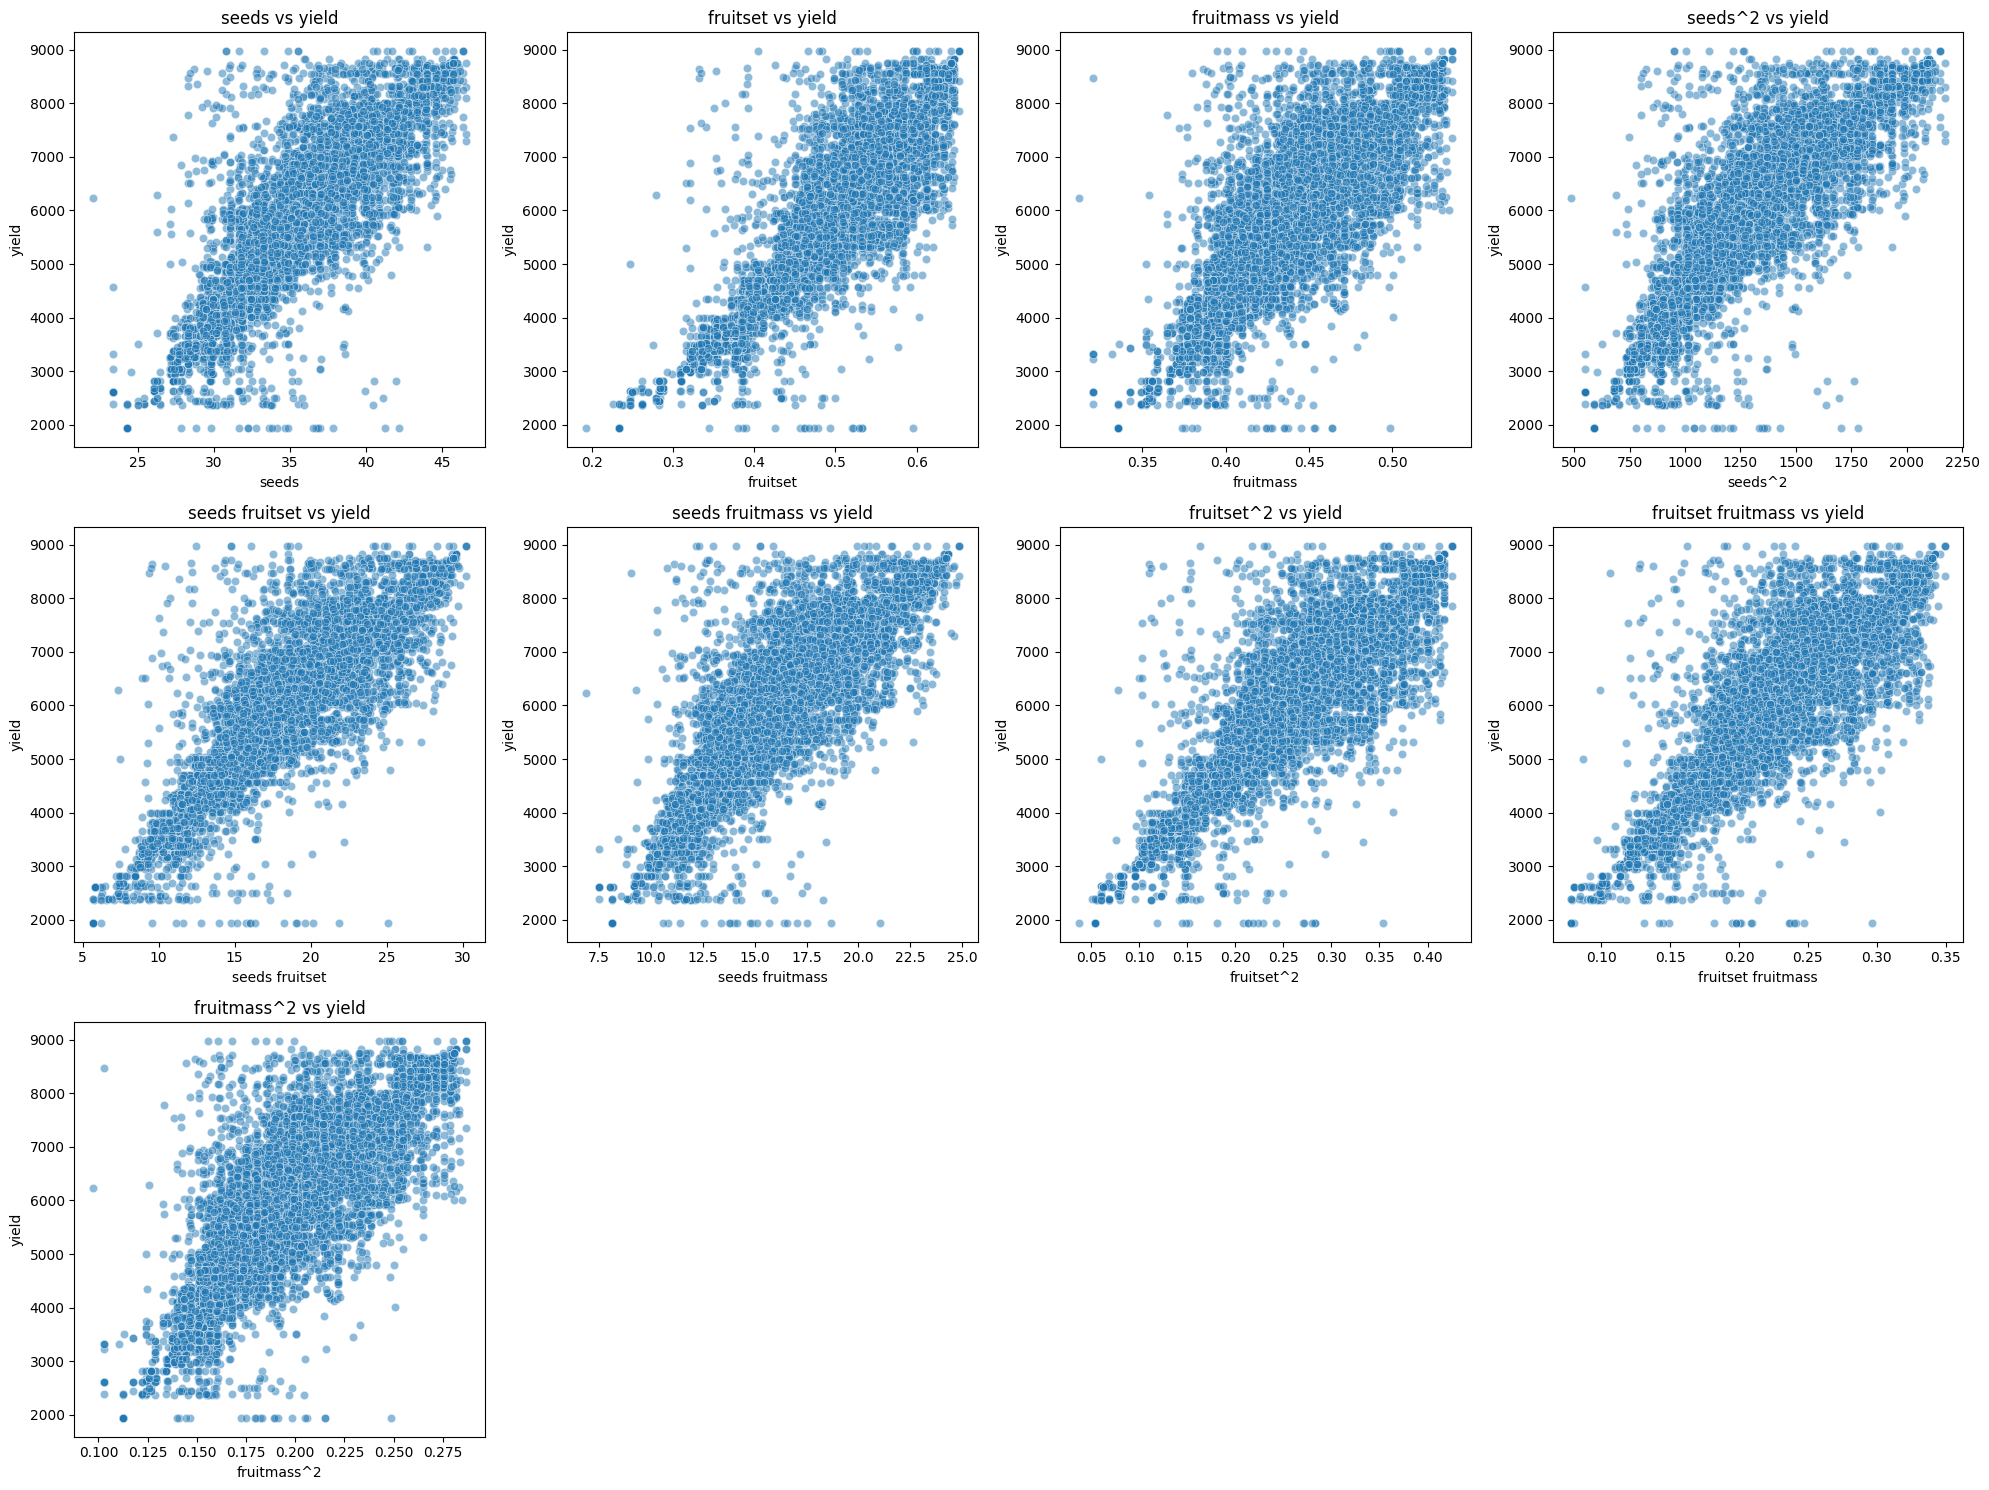

In [245]:
plot_scatter(df_poly,'yield')

In [246]:
df_poly.skew()

seeds                 0.015387
fruitset             -0.426606
fruitmass            -0.055531
seeds^2               0.260150
seeds fruitset        0.045897
seeds fruitmass       0.185238
fruitset^2           -0.069722
fruitset fruitmass   -0.033235
fruitmass^2           0.121156
yield                -0.291195
dtype: float64

In [247]:
train_data.describe().T

count         mean          std          min  \
id                    15289.0  7644.000000  4413.698468     0.000000   
clonesize             15289.0    19.704690     6.595211    10.000000   
honeybee              15289.0     0.389314     0.361643     0.000000   
bumbles               15289.0     0.286768     0.059917     0.000000   
andrena               15289.0     0.492675     0.148115     0.000000   
osmia                 15289.0     0.592355     0.139489     0.000000   
MaxOfUpperTRange      15289.0    82.169887     9.146703    69.700000   
MinOfUpperTRange      15289.0    49.673281     5.546405    39.000000   
AverageOfUpperTRange  15289.0    68.656256     7.641807    58.200000   
MaxOfLowerTRange      15289.0    59.229538     6.610640    50.200000   
MinOfLowerTRange      15289.0    28.660553     3.195367    24.300000   
AverageOfLowerTRange  15289.0    48.568500     5.390545    41.200000   
RainingDays           15289.0    18.660865    11.657582     1.000000   
AverageRainingDays    15289.0     0.324176     0.163905     0.060000   
fruitset              15289.0     0.502741     0.074390     0.192732   
fruitmass             15289.0     0.446553     0.037035     0.311921   
seeds                 15289.0    36.164950     4.031087    22.079199   
yield                 15289.0  6025.193999  1337.056850  1945.530610   
honeybee_boxcox       15289.0     0.243187     0.055908     0.000000   
osmia_box_cox         15289.0     1.723487     0.679590     0.000000   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               12.500000    25.000000     25.000000     40.000000  
honeybee                 0.250000     0.500000      0.500000     18.430000  
bumbles                  0.250000     0.250000      0.380000      0.585000  
andrena                  0.380000     0.500000      0.630000      0.750000  
osmia                    0.500000     0.630000      0.750000      0.750000  
MaxOfUpperTRange        77.400000    86.000000     86.000000     94.600000  
MinOfUpperTRange        46.800000    52.000000     52.000000     57.200000  
AverageOfUpperTRange    64.700000    71.900000     71.900000     79.000000  
MaxOfLowerTRange        55.800000    62.000000     62.000000     68.200000  
MinOfLowerTRange        27.000000    30.000000     30.000000     33.000000  
AverageOfLowerTRange    45.800000    50.800000     50.800000     55.900000  
RainingDays             16.000000    16.000000     24.000000     34.000000  
AverageRainingDays       0.260000     0.260000      0.390000      0.560000  
fruitset                 0.458246     0.506600      0.560445      0.652144  
fruitmass                0.419216     0.446570      0.474134      0.535660  
seeds                   33.232449    36.040675     39.158238     46.585105  
yield                 5128.163510  6117.475900   7019.694380   8969.401840  
honeybee_boxcox          0.186202     0.294344      0.294344      0.593147  
osmia_box_cox            1.176819     1.821591      2.604044      2.604044

## **8. Scaling**

In [248]:
train_data = train_data.drop(['honeybee','osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange',
                   'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'], axis=1)

In [249]:
train_data.columns

Index(['id', 'clonesize', 'bumbles', 'andrena', 'AverageOfUpperTRange',
       'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield',
       'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

- **Scale using standard scaler**

In [250]:
# All columns except these ones
columns_to_exclude = ['id','honeybee_boxcox', 'osmia_box_cox', 'yield']
columns_to_scale = [col for col in train_data.columns if col not in columns_to_exclude]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaling
train_data.loc[:,columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

# Save the scaler in the models folder
import joblib
joblib.dump(scaler, "/home/davidkibet/Desktop/ML /models/scaler.pkl")

['/home/davidkibet/Desktop/ML /models/scaler.pkl']

In [251]:
train_data.describe().T

count          mean          std          min  \
id                    15289.0  7.644000e+03  4413.698468     0.000000   
clonesize             15289.0 -2.111087e-16     1.000033    -1.471523   
bumbles               15289.0  8.165502e-16     1.000033    -4.786246   
andrena               15289.0  1.989092e-16     1.000033    -3.326411   
AverageOfUpperTRange  15289.0  3.327547e-16     1.000033    -1.368341   
RainingDays           15289.0  2.109925e-16     1.000033    -1.515018   
fruitset              15289.0  1.914734e-16     1.000033    -4.167510   
fruitmass             15289.0  8.314219e-16     1.000033    -3.635347   
seeds                 15289.0  1.633217e-15     1.000033    -3.494396   
yield                 15289.0  6.025194e+03  1337.056850  1945.530610   
honeybee_boxcox       15289.0  2.431872e-01     0.055908     0.000000   
osmia_box_cox         15289.0  1.723487e+00     0.679590     0.000000   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               -1.092448     0.802929      0.802929      3.077381  
bumbles                 -0.613664    -0.613664      1.556078      4.977594  
andrena                 -0.760754     0.049454      0.927179      1.737386  
AverageOfUpperTRange    -0.517729     0.424487      0.424487      1.353617  
RainingDays             -0.228259    -0.228259      0.458012      1.315851  
fruitset                -0.598147     0.051875      0.775730      2.008454  
fruitmass               -0.738158     0.000468      0.744748      2.406102  
seeds                   -0.727495    -0.030830      0.742575      2.585034  
yield                 5128.163510  6117.475900   7019.694380   8969.401840  
honeybee_boxcox          0.186202     0.294344      0.294344      0.593147  
osmia_box_cox            1.176819     1.821591      2.604044      2.604044

> Try encoding what I presume are categorical colums

In [252]:
# from sklearn.preprocessing import OneHotEncoder

# # List of categorical columns to encode
# categorical_cols = ['clonesize', 'bumbles', 'andrena',
#                    'AverageOfUpperTRange',
#                    'RainingDays', 'honeybee_boxcox',
#                    'osmia_box_cox']

# # Initialize the encoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# # Fit and transform the data
# encoded_data = encoder.fit_transform(train_data[categorical_cols])

# # Create a DataFrame with the encoded data
# # Get the feature names from the encoder
# feature_names = encoder.get_feature_names_out(categorical_cols)
# encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# # Combine with the non-categorical columns
# non_cat_cols = [col for col in train_data.columns if col not in categorical_cols]
# encoded_df = pd.concat([train_data[non_cat_cols].reset_index(drop=True),
#                      encoded_df.reset_index(drop=True)], axis=1)

In [253]:
# encoded_df.shape

In [254]:
# encoded_df.describe().T

In [255]:
# encoded_df.columns

In [256]:
# train_data = train_data.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange',
#        'MinOfLowerTRange', 'AverageOfLowerTRange',
#        'AverageRainingDays'], axis=1)

> the above failed because of the curse of dimenstionality

In [257]:
train_data.columns

Index(['id', 'clonesize', 'bumbles', 'andrena', 'AverageOfUpperTRange',
       'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield',
       'honeybee_boxcox', 'osmia_box_cox'],
      dtype='object')

## **9. Training**

- **Set X and y**

In [258]:
X = train_data.drop(['id','yield'], axis=1)
y = train_data['yield']

- **X and y info**

In [259]:
X.describe()

clonesize       bumbles       andrena  AverageOfUpperTRange  \
count  1.528900e+04  1.528900e+04  1.528900e+04          1.528900e+04   
mean  -2.111087e-16  8.165502e-16  1.989092e-16          3.327547e-16   
std    1.000033e+00  1.000033e+00  1.000033e+00          1.000033e+00   
min   -1.471523e+00 -4.786246e+00 -3.326411e+00         -1.368341e+00   
25%   -1.092448e+00 -6.136645e-01 -7.607539e-01         -5.177290e-01   
50%    8.029286e-01 -6.136645e-01  4.945381e-02          4.244873e-01   
75%    8.029286e-01  1.556078e+00  9.271788e-01          4.244873e-01   
max    3.077381e+00  4.977594e+00  1.737386e+00          1.353617e+00   

        RainingDays      fruitset     fruitmass         seeds  \
count  1.528900e+04  1.528900e+04  1.528900e+04  1.528900e+04   
mean   2.109925e-16  1.914734e-16  8.314219e-16  1.633217e-15   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -1.515018e+00 -4.167510e+00 -3.635347e+00 -3.494396e+00   
25%   -2.282593e-01 -5.981469e-01 -7.381576e-01 -7.274954e-01   
50%   -2.282593e-01  5.187476e-02  4.675927e-04 -3.083018e-02   
75%    4.580118e-01  7.757299e-01  7.447480e-01  7.425753e-01   
max    1.315851e+00  2.008454e+00  2.406102e+00  2.585034e+00   

       honeybee_boxcox  osmia_box_cox  
count     15289.000000   15289.000000  
mean          0.243187       1.723487  
std           0.055908       0.679590  
min           0.000000       0.000000  
25%           0.186202       1.176819  
50%           0.294344       1.821591  
75%           0.294344       2.604044  
max           0.593147       2.604044

In [260]:
y.describe()

count    15289.000000
mean      6025.193999
std       1337.056850
min       1945.530610
25%       5128.163510
50%       6117.475900
75%       7019.694380
max       8969.401840
Name: yield, dtype: float64

- **Test train, split at 0.2**

In [261]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [262]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12231, 10)
(3058, 10)
(12231,)
(3058,)


- **Regression model from sklearn**

In [263]:
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
model = LinearRegression()

In [264]:
model.fit(X_train,y_train)

LinearRegression()

- **Train and test predictions**

In [265]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

- **MSE**

In [266]:
from sklearn.metrics import mean_squared_error
print(f'y_train MSE:{mean_squared_error(y_train_prediction,y_train)}')
print(f'y_train MSE:{mean_squared_error(y_test_prediction,y_test)}')

y_train MSE:341855.2135351037
y_train MSE:333454.06371149345


In [267]:
y_mean = np.mean(y_train)
baseline_mse = np.mean((y_test - y_mean) ** 2)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 1758553.6481181055


- **Make pipeline**

In [268]:
degrees = range(1,3)
train_errors = []
test_errors = []
bic_scores = []

In [269]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

n = len(y_train)
for d in degrees:
 model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
 model.fit(X_train, y_train)

 y_train_pred = model.predict(X_train)
 y_test_pred = model.predict(X_test)

 train_mse = mean_squared_error(y_train, y_train_pred)
 test_mse = mean_squared_error(y_test, y_test_pred)

 train_errors.append(train_mse)
 test_errors.append(test_mse)

 # Compute BIC: BIC = n * log(MSE) + k * log(n)
 k = sum(model.named_steps["linearregression"].coef_ != 0) # Number of parameters
 bic = n * np.log(train_mse) + k * np.log(n)
 bic_scores.append(bic)

 print(f"Degree {d}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}, BIC = {bic:.2f}")

Degree 1: Train MSE = 341855.2135, Test MSE = 333454.0637, BIC = 155943.26
Degree 2: Train MSE = 329046.3537, Test MSE = 323222.6921, BIC = 156003.23


> The learning could not go past degree 2 because of the complexity

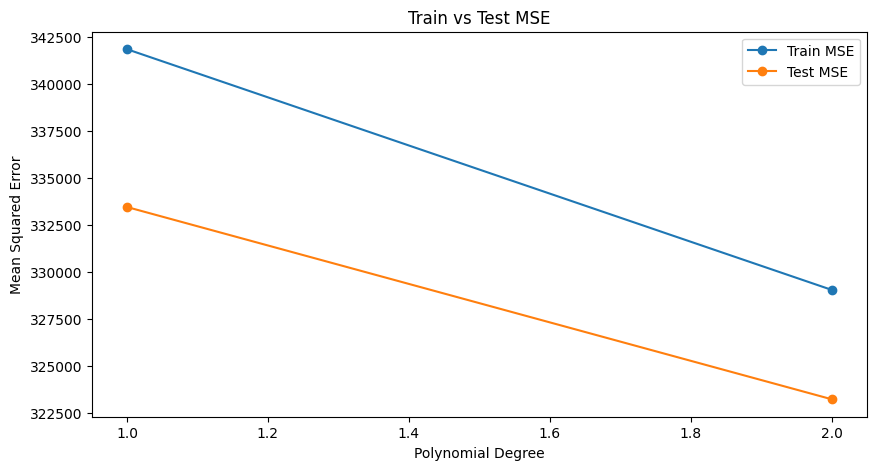

In [270]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label="Train MSE", marker="o")
plt.plot(degrees, test_errors, label="Test MSE", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE")
plt.legend()
plt.show()

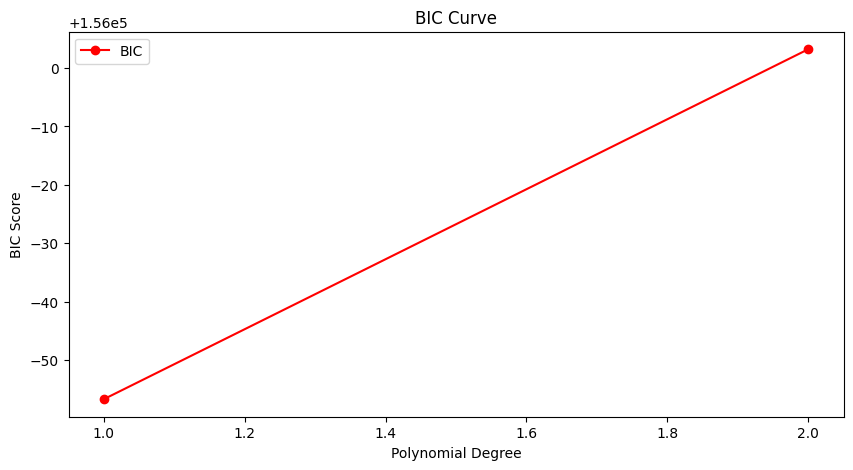

In [271]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, bic_scores, label="BIC", marker="o", color="red")
plt.xlabel("Polynomial Degree")
plt.ylabel("BIC Score")
plt.title("BIC Curve")
plt.legend()
plt.show()

 ## **10. Save the model at degree 2**

In [272]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create a polynomial regression pipeline for degree 2
degree = 2  # Explicitly setting degree 2
poly_reg_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("linear_regression", LinearRegression())
])

# Train the model on existing data
poly_reg_model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [273]:
import joblib

# Save the trained Degree 2 model
joblib.dump(poly_reg_model, "/home/davidkibet/Desktop/ML /models/degree2_model.pkl")

['/home/davidkibet/Desktop/ML /models/degree2_model.pkl']

## **11. Testing**

- **Test data preview**


In [274]:
test_data.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0  15289       25.0      0.25     0.25     0.25   0.25              86.0   
1  15290       12.5      0.25     0.25     0.75   0.63              94.6   
2  15291       12.5      0.25     0.25     0.63   0.63              86.0   
3  15292       25.0      0.50     0.38     0.38   0.63              86.0   
4  15293       37.5      0.75     0.25     0.25   0.25              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              57.2                  79.0              68.2              33.0   
2              52.0                  71.9              62.0              30.0   
3              52.0                  71.9              62.0              30.0   
4              57.2                  79.0              68.2              33.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  50.8         24.0                0.39  0.399367   0.408088   
1                  55.9          1.0                0.10  0.488048   0.442866   
2                  50.8         16.0                0.26  0.583379   0.487057   
3                  50.8         16.0                0.26  0.433014   0.422847   
4                  55.9         24.0                0.39  0.360996   0.388860   

       seeds  
0  31.394569  
1  36.846956  
2  40.037644  
3  33.116091  
4  29.558019

In [275]:
test_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [276]:
test_cols = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']

- **Distribution of test data**

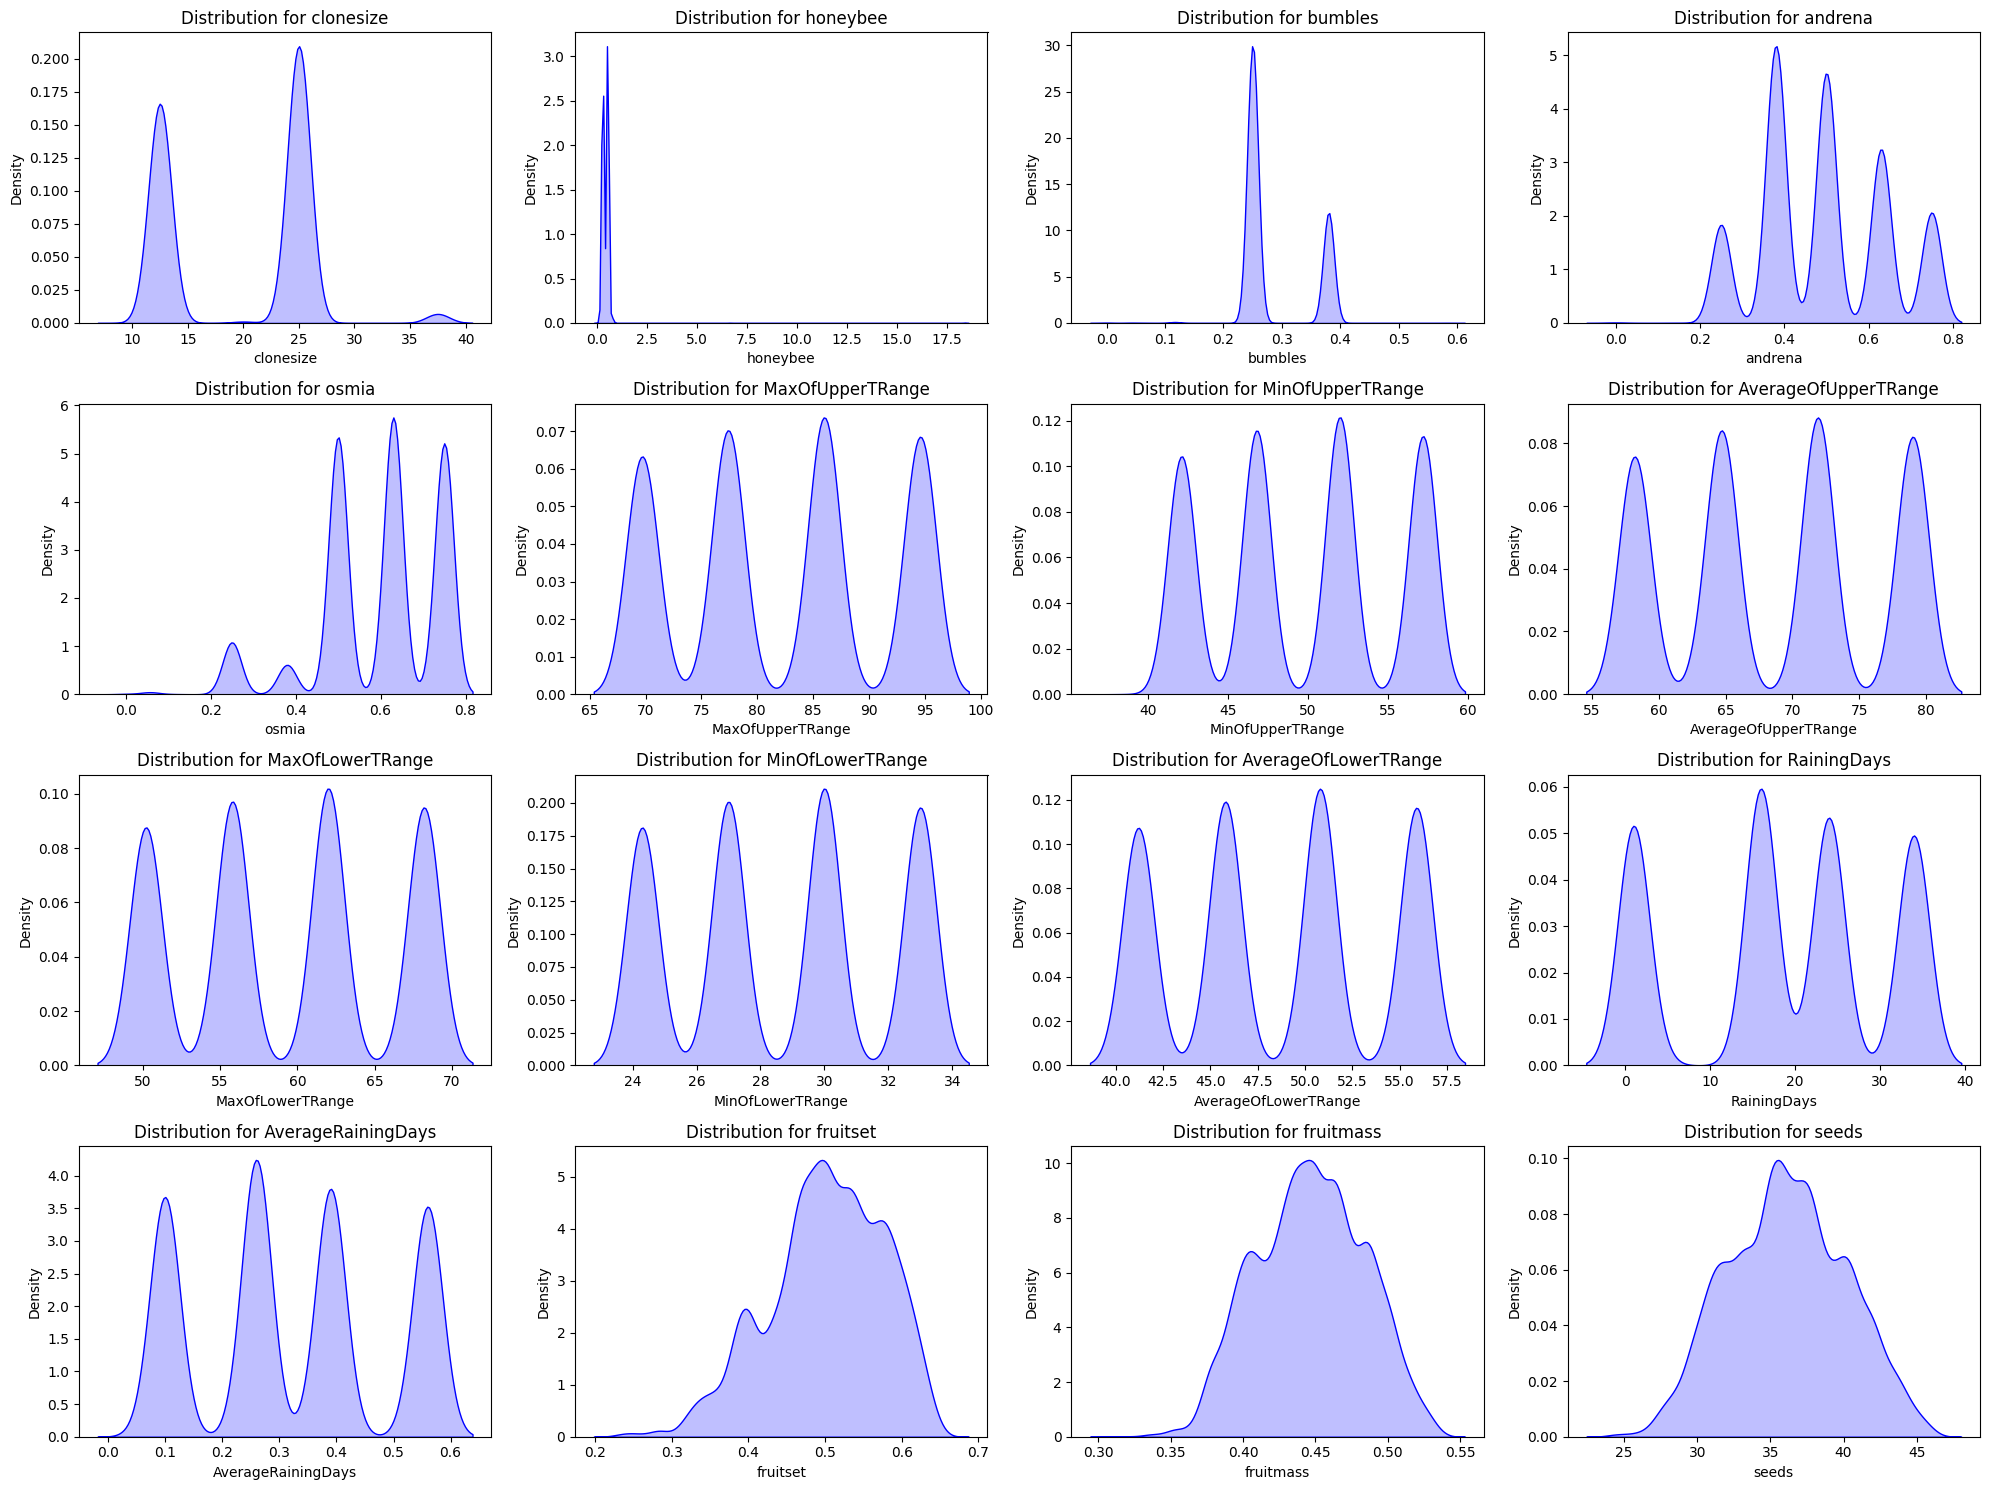

In [277]:
plt.figure(figsize=(20,15))

for i, col in enumerate(test_cols,1):
 plt.subplot(4,4,i)
 sns.kdeplot(test_data[col], fill=True, color='blue')
 plt.title(f'Distribution for {col}')

plt.tight_layout()
plt.show()

- **Tranforming honeybee and osmia**

In [278]:
from scipy.stats import boxcox
# Transform honeybee
test_data["honeybee_boxcox"], lambda_val = boxcox(test_data["honeybee"] + 1)  # Add 1 to avoid zero issues
print("Honeybee Lambda:", lambda_val)  # The optimal power transformation
# Transform osmia
test_data["osmia_box_cox"], lambda_val = boxcox(test_data["osmia"]+1)  # Add 1 to avoid zero issues
print("Osmia Lambda:", lambda_val)  # The optimal power transformation

Honeybee Lambda: -1.769319923317443
Osmia Lambda: 4.6911873142822635


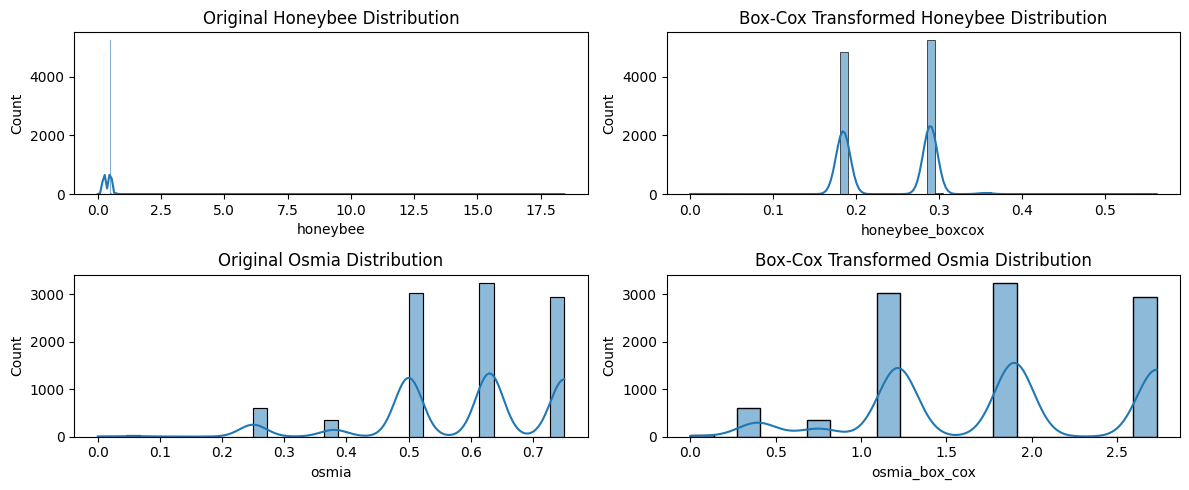

In [279]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

sns.histplot(test_data["honeybee"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Original Honeybee Distribution")

sns.histplot(test_data["honeybee_boxcox"], kde=True, ax=axes[0,1])
axes[0,1].set_title("Box-Cox Transformed Honeybee Distribution")

sns.histplot(test_data["osmia"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Original Osmia Distribution")

sns.histplot(test_data["osmia_box_cox"], kde=True, ax=axes[1,1])
axes[1,1].set_title("Box-Cox Transformed Osmia Distribution")

plt.tight_layout()
plt.show()

In [280]:
test_data.skew()

id                       0.000000
clonesize                0.027209
honeybee                39.631323
bumbles                  0.791733
andrena                  0.190835
osmia                   -0.855134
MaxOfUpperTRange         0.013530
MinOfUpperTRange         0.007689
AverageOfUpperTRange     0.001412
MaxOfLowerTRange         0.008608
MinOfLowerTRange         0.010544
AverageOfLowerTRange     0.010779
RainingDays             -0.245314
AverageRainingDays       0.087598
fruitset                -0.434380
fruitmass               -0.065786
seeds                    0.009295
honeybee_boxcox          0.010568
osmia_box_cox           -0.132333
dtype: float64

> better skew

- **Correlation heatmap for test data**

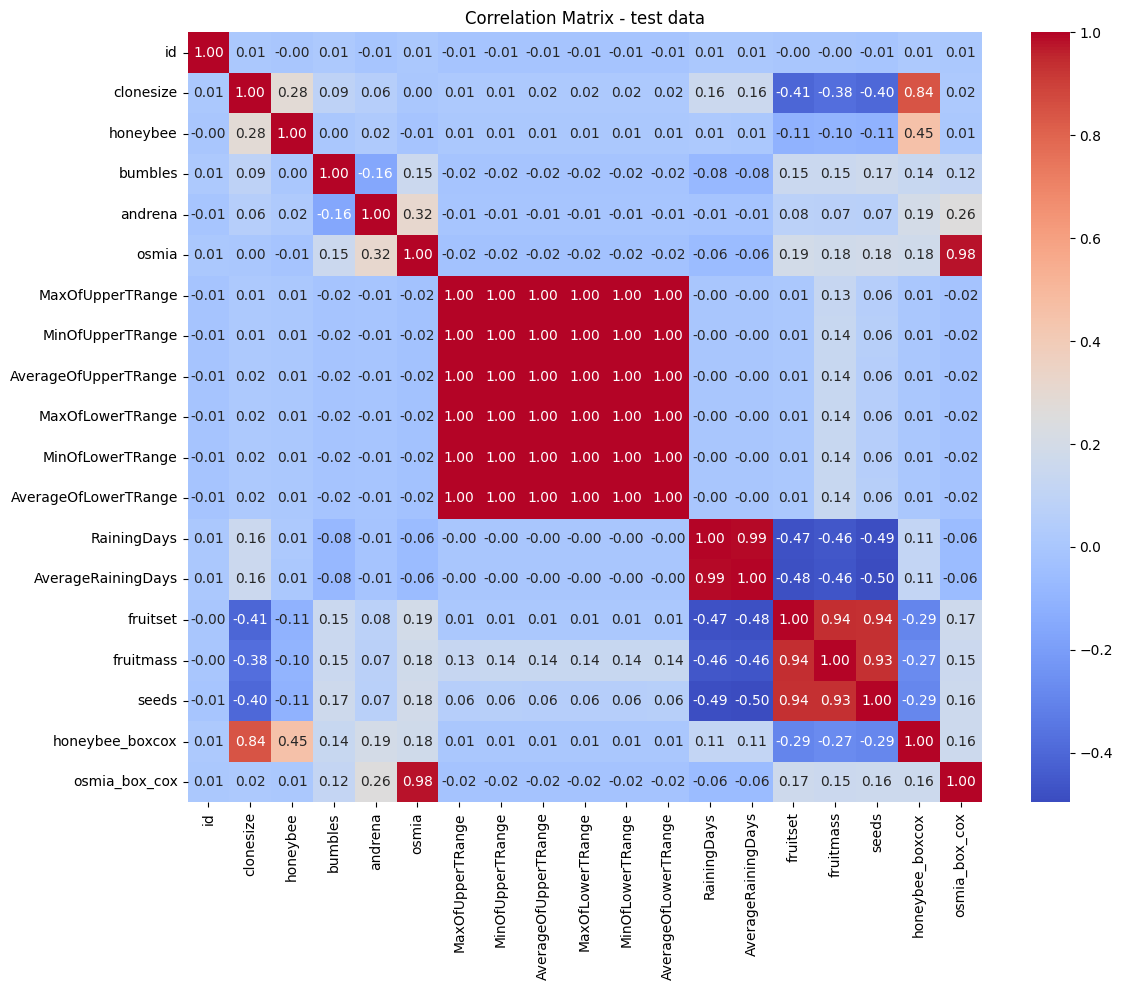

In [281]:
correlations = test_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - test data')
plt.tight_layout()
plt.show()

> drop columns that have the same correlation, the assumption is that they have the same weight

In [282]:
test_data = test_data.drop(['honeybee','osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange',
                   'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'], axis=1)

In [283]:
test_data.columns

Index(['id', 'clonesize', 'bumbles', 'andrena', 'AverageOfUpperTRange',
       'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'honeybee_boxcox',
       'osmia_box_cox'],
      dtype='object')

- **Scaling test data**

In [284]:
# All columns except these ones
columns_to_exclude = ['id','honeybee_boxcox', 'osmia_box_cox']
columns_to_scale = [col for col in test_data.columns if col not in columns_to_exclude]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = joblib.load("/home/davidkibet/Desktop/ML /models/scaler.pkl")
# Apply scaling
test_data.loc[:,columns_to_scale] = scaler.transform(test_data[columns_to_scale])

> note that I'm using trandform and not fit_transform, this is because I'm using the scaler I had used to scale the train data and saved it as a model

In [285]:
test_data.describe().T

count          mean          std           min  \
id                    10194.0  20385.500000  2942.898656  15289.000000   
clonesize             10194.0      0.013839     0.999525     -1.471523   
bumbles               10194.0     -0.007682     0.999192     -4.786246   
andrena               10194.0     -0.009096     1.000380     -3.326411   
AverageOfUpperTRange  10194.0      0.004130     1.000794     -1.368341   
RainingDays           10194.0     -0.013168     1.010541     -1.515018   
fruitset              10194.0     -0.012531     1.004297     -3.618721   
fruitmass             10194.0     -0.005617     1.000535     -3.635347   
seeds                 10194.0     -0.007095     0.997254     -2.938342   
honeybee_boxcox       10194.0      0.240146     0.054206      0.000000   
osmia_box_cox         10194.0      1.801193     0.720131      0.000000   

                               25%           50%           75%           max  
id                    17837.250000  20385.500000  22933.750000  25482.000000  
clonesize                -1.092448      0.802929      0.802929      2.698305  
bumbles                  -0.613664     -0.613664      1.556078      4.977594  
andrena                  -0.760754      0.049454      0.927179      1.737386  
AverageOfUpperTRange     -0.517729      0.424487      0.424487      1.353617  
RainingDays              -0.228259     -0.228259      0.458012      1.315851  
fruitset                 -0.598147      0.048466      0.760667      2.008454  
fruitmass                -0.747568      0.000468      0.705234      2.406102  
seeds                    -0.727629     -0.037558      0.734891      2.474470  
honeybee_boxcox           0.184361      0.289365      0.289365      0.562221  
osmia_box_cox             1.215052      1.896089      2.730268      2.730268

- **Load and predict degree2 model saved from the training data**

In [286]:
# Load the trained Degree 2 model
loaded_model = joblib.load("/home/davidkibet/Desktop/ML /models/degree2_model.pkl")

# Transform new dataset and predict
test_predictions = loaded_model.predict(test_data.drop('id', axis =1))  # No need to manually transform!

In [287]:
test_predictions

array([4351.14236992, 6291.44948506, 7129.49035661, ..., 6838.42795445,
       4514.69616872, 7272.19378683], shape=(10194,))

> Here are our test predictions as a ndarray

In [288]:
predictions_df = pd.DataFrame({
    'id': test_data['id'],  # Keep the original ID column
    'yield': test_predictions # Store the model predictions
})

> Next, I create a new dataframe call predictions_df and append the test predictions to the id column

In [289]:
predictions_df.to_csv("/home/davidkibet/Desktop/ML /predictions/blueberry_yield_predictions.csv", index=False)

In [290]:
predictions_df.head()

id        yield
0  15289  4351.142370
1  15290  6291.449485
2  15291  7129.490357
3  15292  4910.059103
4  15293  3921.701307